In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read data from CSV file
file_link = 'https://drive.google.com/file/d/1x7QH3zXGnVFnFGT-P2vqVMdv4RvVocei/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)
df.tail()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
188,sandy,5.652,daily,none,28.0,70.2,0
189,clay,7.528,weekly,chemical,30.5,60.1,1
190,loam,4.934,bi-weekly,none,24.5,61.7,0
191,sandy,8.273,daily,organic,27.9,69.5,1
192,clay,6.732,weekly,none,21.7,56.9,0


In [ ]:
# total number of rows and columns
df.shape

(193, 7)

In [ ]:
# total number of null values in each column
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,0
Water_Frequency,0
Fertilizer_Type,0
Temperature,0
Humidity,0
Growth_Milestone,0


In [ ]:
# total number of duplicate rows
df.duplicated().sum()

0

In [ ]:
# Feature Engineering(Label Encoding) to handle categorical values
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to multiple columns individually
df['Soil_Type'] = label_encoder.fit_transform(df['Soil_Type'])
df['Water_Frequency'] = label_encoder.fit_transform(df['Water_Frequency'])
df['Fertilizer_Type'] = label_encoder.fit_transform(df['Fertilizer_Type'])

In [ ]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,5.192294,0,0,31.719602,61.591861,0
1,2,4.033133,2,2,28.919484,52.422276,1
2,1,8.892769,0,1,23.179059,44.660539,0
3,1,8.241144,0,1,18.465886,46.433227,0
4,2,8.374043,0,2,18.128741,63.625923,0


<Axes: xlabel='Temperature', ylabel='Humidity'>

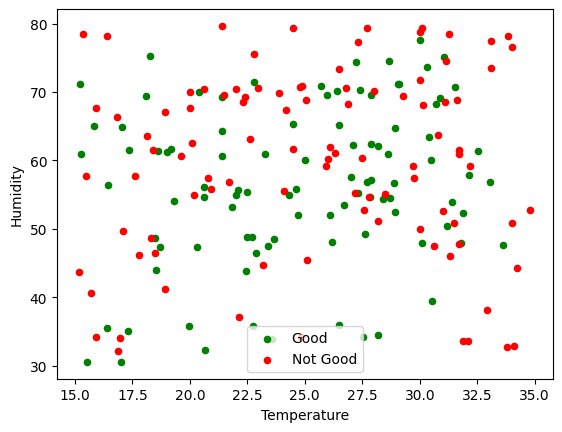

In [ ]:
#distribution of the classes
good_df = df[df['Growth_Milestone']==1]
not_good_df = df[df['Growth_Milestone']==0]


axes=good_df.plot(kind='scatter', x="Temperature", y="Humidity", color='green', label='Good')
not_good_df.plot(kind='scatter', x="Temperature", y="Humidity", color='red', label='Not Good',ax=axes)

In [ ]:
#identifying unwanted rows
#since my dataset has no null values or invalid values in any row so I don't need to remove any rows.

In [ ]:
#remove unwanted columns
df.columns
feature_df = df[['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type', 'Temperature', 'Humidity']]
X = np.asarray(feature_df)
y = np.asarray(df['Growth_Milestone'])

# X[0:3]
# y[0:3]

In [ ]:
df_corr = df.corr()

<Axes: >

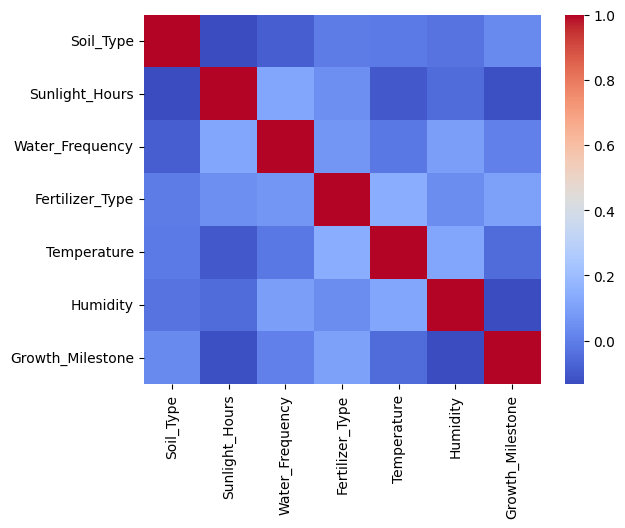

In [ ]:
import seaborn as sns

sns.heatmap(df_corr, cmap = 'coolwarm')

In [ ]:
# From the correlation, we can see that we don't need to remove any columns.

# Implementing SVM Using Scikit-learn Library

In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(115, 6) (115,)
(78, 6) (78,)


In [ ]:
#modeling using SVM
from sklearn import svm
classifier = svm.SVC(kernel='linear', C=2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [ ]:
#result comparison
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.5897435897435898
